
In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, there was a significant amount of typically confidential information entered into public record, including tens of thousands of emails and detailed financial data for top executives.

In this project I will build a person of interest identifier based on financial and email data made public as a result of the Enron scandal. I use email and financial data for 146 executives at Enron to identify persons of interest in the fraud case. A person of interest (POI) is someone who was indicted for fraud, settled with the government, or testified in exchange for immunity. This report documents the machine learning techniques used in building a POI identifier.


There are four major steps in my project:

Enron dataset

Feature processing

Algorithm

Validation

In [2]:
import os 
os.chdir('/Users/muhammedeltabakh/Desktop/my_work/ud120-projects/final_project/')

In [3]:
%matplotlib inline
from IPython.display import Image
import matplotlib.pyplot as plt
from time import time
import sys
import pickle 
from sklearn import preprocessing 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

sys.path.append("../tools/")



feature_list = ["poi"]

from feature_format import featureFormat
from feature_format import targetFeatureSplit

/Users/muhammedeltabakh/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
data_dict = pickle.load(open("final_project_dataset.pkl", "r"))

In [5]:
print 'No. of executives in Enron =', len(data_dict.keys())

No. of executives in Enron = 146


In [6]:
print data_dict.keys()

['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY 

In [7]:
print data_dict['SUNDE MARTIN']

{'salary': 257486, 'to_messages': 2647, 'deferral_payments': 'NaN', 'total_payments': 1545059, 'exercised_stock_options': 'NaN', 'bonus': 700000, 'restricted_stock': 698920, 'shared_receipt_with_poi': 2565, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 698920, 'expenses': 'NaN', 'loan_advances': 'NaN', 'from_messages': 38, 'other': 111122, 'from_this_person_to_poi': 13, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 476451, 'email_address': 'marty.sunde@enron.com', 'from_poi_to_this_person': 37}


# Detecting outliers
plotting salaries against bonuses

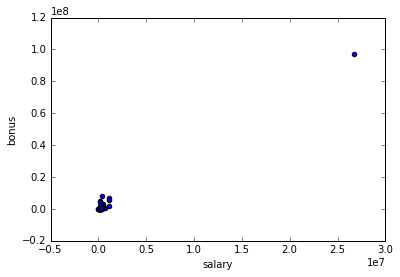

In [8]:
features = ['salary', 'bonus']

data = featureFormat(data_dict, features)
#print data

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter(salary, bonus)
    
plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

# Removing outliers

In [9]:
features = ['salary', 'bonus']
data_dict.pop('TOTAL', 0)
print data_dict
data = featureFormat(data_dict, features)
#print data

{'METTS MARK': {'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}, 'BAXTER JOHN C': {'salary': 267102, 'to_messages': 'NaN', 'deferral_payments': 1295738, 'total_payments': 5634343, 'exercised_stock_options': 6680544, 'bonus': 1200000, 'restricted_stock': 3942714, 'shared_receipt_with_poi': 'NaN', 'restricted_stock_deferred': 'NaN', 'total_stock_value': 10623258, 'expenses': 11200, 'loan_advances': 'NaN', 'from_messages': 'NaN', 'other': 2660303, 'from_this_person_to_poi': 'NaN', 'poi': False, 'direct

In [10]:
outliers = []

for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    outliers.append((key, int(val)))
    
outliers_final = (sorted(outliers, key = lambda x:x[1], reverse = True)[:4])
print outliers_final

[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321), ('FREVERT MARK A', 1060932), ('PICKERING MARK R', 655037)]


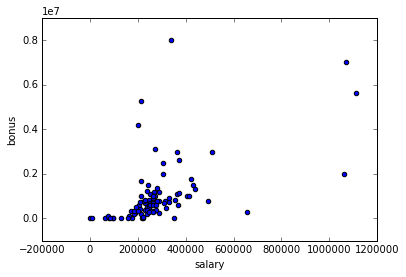

In [11]:
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter(salary, bonus)
    
plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

# Feature Processing

In [12]:
def dict_to_list(key, normalizer):
    new_list = []
    
    for i in data_dict:
       
        if data_dict[i][key] == 'NaN' or data_dict[i][normalizer] == 'NaN':
            new_list.append(0.)
        
        elif data_dict[i][key] >=0:
            new_list.append(float(data_dict[i][key]) / float(data_dict[i][normalizer]))
        
        print data_dict[i][key]

    return new_list

    
    


38
NaN
NaN
10
32
NaN
0
58
44
61
10
12
25
37
0
NaN
240
12
25
NaN
NaN
17
251
NaN
NaN
94
NaN
4
NaN
23
35
NaN
144
4
NaN
NaN
40
NaN
10
16
25
NaN
67
528
NaN
NaN
NaN
0
NaN
39
NaN
74
28
13
NaN
115
NaN
186
92
0
66
NaN
NaN
NaN
NaN
123
NaN
20
54
NaN
NaN
52
NaN
NaN
NaN
180
140
NaN
1
0
204
NaN
228
106
0
NaN
0
199
42
41
NaN
0
NaN
NaN
NaN
88
NaN
39
NaN
NaN
7
NaN
NaN
140
0
22
NaN
NaN
47
24
NaN
NaN
13
NaN
35
NaN
NaN
0
29
0
NaN
11
10
10
NaN
NaN
305
64
242
NaN
NaN
35
NaN
42
53
NaN
28
10
8
156
NaN
58
0
188
52
1
NaN
NaN
0
21
NaN
0
26
15
48
17
0
2
13
0
NaN
11
0
19
NaN
NaN
0
194
NaN
NaN
83
NaN
0
NaN
8
48
NaN
386
7
NaN
NaN
1
NaN
0
0
2
NaN
14
411
NaN
NaN
NaN
0
NaN
0
NaN
65
23
14
NaN
4
NaN
24
194
1
609
NaN
NaN
NaN
NaN
16
NaN
15
1
NaN
NaN
0
NaN
NaN
NaN
61
15
NaN
8
0
49
NaN
108
3
0
NaN
0
25
4
171
NaN
4
NaN
NaN
NaN
30
NaN
18
NaN
NaN
0
NaN
NaN
387
0
7
NaN
NaN
65
6
NaN
NaN
1
NaN
5
NaN
NaN
1
7
0
NaN
2
27
3
NaN
NaN
14
20
6
NaN
NaN
38
NaN
37
15
NaN
5
11
0
71
NaN
12
0
11
6


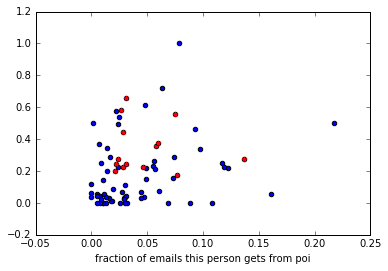

In [13]:
### create two lists of new features
fraction_from_poi_email=dict_to_list("from_poi_to_this_person","to_messages")
fraction_to_poi_email=dict_to_list("from_this_person_to_poi","from_messages")

### insert new features into data_dict
count=0
for i in data_dict:
    data_dict[i]["fraction_from_poi_email"]=fraction_from_poi_email[count]
    data_dict[i]["fraction_to_poi_email"]=fraction_to_poi_email[count]
    count +=1

    
features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email"]    
    ### store to my_dataset for easy export below
my_dataset = data_dict


### these two lines extract the features specified in features_list
### and extract them from data_dict, returning a numpy array
data = featureFormat(my_dataset, features_list)

### plot new features
for point in data:
    from_poi = point[1]
    to_poi = point[2]
    plt.scatter( from_poi, to_poi )
    if point[0] == 1:
        plt.scatter(from_poi, to_poi, color="r", marker="*")
plt.xlabel("fraction of emails this person gets from poi")
plt.show()

In [20]:
features_list = ["poi", "salary", "bonus", "fraction_from_poi_email", "fraction_to_poi_email",
                 'deferral_payments', 'total_payments', 'loan_advances', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']
data = featureFormat(my_dataset, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)




from sklearn.tree import DecisionTreeClassifier

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
pred= clf.predict(features_test)
print 'accuracy', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"



importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(16):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

accuracy 0.733333333333
Decision tree algorithm time: 0.002 s
Feature Ranking: 
1 feature salary (0.248851080523)
2 feature bonus (0.158290984378)
3 feature fraction_from_poi_email (0.14622972935)
4 feature fraction_to_poi_email (0.14139568871)
5 feature deferral_payments (0.118337314859)
6 feature total_payments (0.0747826086957)
7 feature loan_advances (0.0534161490683)
8 feature restricted_stock_deferred (0.0377115287109)
9 feature deferred_income (0.0209849157054)
10 feature total_stock_value (0.0)
11 feature expenses (0.0)
12 feature exercised_stock_options (0.0)
13 feature long_term_incentive (0.0)
14 feature shared_receipt_with_poi (0.0)
15 feature restricted_stock (0.0)
16 feature director_fees (0.0)


# Algorithm Selection and Tuning¶


In [34]:
features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email", "shared_receipt_with_poi"]

### try Naive Bayes for prediction
t0 = time()

clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
print accuracy

print "NB algorithm time:", round(time()-t0, 3), "s"

0.892857142857
NB algorithm time: 0.002 s


# Analysis Validation and Performance¶


In [40]:
### features_list is a list of strings, each of which is a feature name
### first feature must be "poi", as this will be singled out as the label
features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email", 'shared_receipt_with_poi']


### store to my_dataset for easy export below
my_dataset = data_dict


### these two lines extract the features specified in features_list
### and extract them from data_dict, returning a numpy array
data = featureFormat(my_dataset, features_list)


### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)


### machine learning goes here!
### please name your classifier clf for easy export below

### deploying feature selection
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

### use KFold for split and validate algorithm
from sklearn.cross_validation import KFold
kf=KFold(len(labels),3)
for train_indices, test_indices in kf:
    #make training and testing sets
    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]

from sklearn.tree import DecisionTreeClassifier

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
print 'accuracy before tuning ', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"


### use manual tuning parameter min_samples_split
t0 = time()
clf = DecisionTreeClassifier(min_samples_split=5)
clf = clf.fit(features_train,labels_train)
pred= clf.predict(features_test)
print("done in %0.3fs" % (time() - t0))

acc=accuracy_score(labels_test, pred)

print "Validating algorithm:"
print "accuracy after tuning = ", acc

# function for calculation ratio of true positives
# out of all positives (true + false)
print 'precision = ', precision_score(labels_test,pred)

# function for calculation ratio of true positives
# out of true positives and false negatives
print 'recall = ', recall_score(labels_test,pred)


### dump your classifier, dataset and features_list so
### anyone can run/check your results
pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(data_dict, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )

accuracy before tuning  0.857142857143
Decision tree algorithm time: 0.001 s
done in 0.001s
Validating algorithm:
accuracy after tuning =  0.928571428571
precision =  0.666666666667
recall =  0.666666666667
